In [30]:
%matplotlib inline
%run ./lorenz_system.py

In [31]:
stepCnt = 1000
dt = .01

In [32]:
xs,ys,zs = build_system(stepCnt,dt)

### 3d Plot

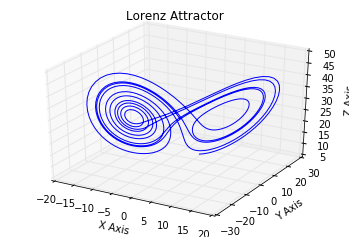

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

My own stuff is below.

### XY Plot

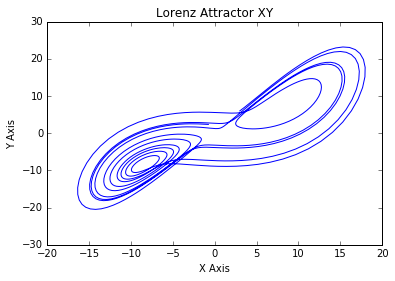

In [34]:
fig = plt.figure()
ax = fig.gca()

ax.plot(xs, ys)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz Attractor XY")

plt.show()

### XZ Plot

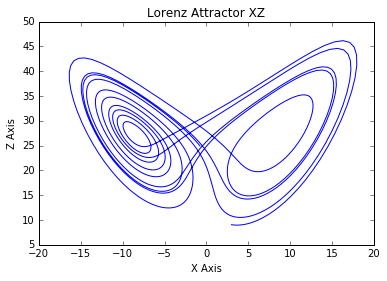

In [35]:
fig = plt.figure()
ax = fig.gca()

ax.plot(xs, zs)
ax.set_xlabel("X Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz Attractor XZ")

plt.show()

### YZ Plot

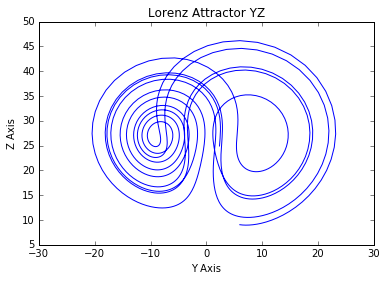

In [36]:
fig = plt.figure()
ax = fig.gca()

ax.plot(ys, zs)
ax.set_xlabel("Y Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz Attractor YZ")

plt.show()

In [37]:
print xs[100]
print ys[100]
print zs[100]

-7.70799795521
-6.15004066935
28.0739358602


In [38]:
def get_wind_angle(p1, p2):
    ''' 
    return slope between the two points
    '''
    # get slope
    slope = (p2[len(p2) - 1] - p2[0]) / (p1[len(p1) - 1] - p1[0])

    # get direction of line
    # 1  = up
    # -1 = down
    direction = 1 
    
    if p2[0] < p2[len(p2) - 1]:
        direction = -1
    elif p2[0] > p2[len(p2) - 1]:
        direction = 1
    else:
        direction = 0
    
    # initialize theta
    theta = 0
    
    if direction == 0:
        # this is a straight line
        theta = 0 if p1[0] < p1[len(p1) - 1] else 180
    elif p2[len(p2) - 1] == p2[0]:
        theta = 90 if direction == 1 else 270
    else:
        # get angle in  degrees, atan(y / x)
        theta = math.degrees(math.atan2(slope, 1))

        # get angle relative to whole graph
        if theta < 0 and direction == 1:
            theta = (theta * -1) + 90
        elif theta < 0 and direction == -1:
            theta = (theta * -1) + 180
        elif theta >= 0 and direction == -1:
            theta += 270
    
    return math.radians(theta)

In [39]:
iterator = 10

x      = []
y      = []
angles = []

for minimum in range(0, len(xs) - iterator, iterator):
    maximum = minimum + iterator
    
    # store info
    x.append(ys[minimum])
    y.append(zs[minimum])
    angles.append(get_wind_angle(ys[minimum:maximum], zs[minimum:maximum]))

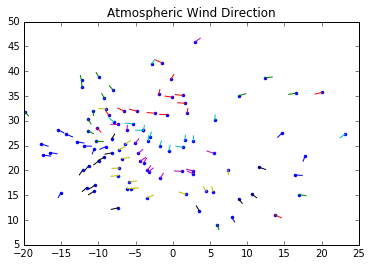

In [40]:
line = plt.figure()

plt.plot(x, y, ".")

for i in range(len(angles)):
    angle = angles[i]
    x_cor = x[i]
    y_cor = y[i]
    
    plt.plot([x_cor, x_cor + math.cos(angle)], [y_cor, y_cor + math.sin(angle)])
    
plt.title("Atmospheric Wind Direction")